In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline


In [7]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('twitter_training.csv')


In [14]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
df.shape

(74681, 4)

In [18]:
df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']

In [19]:
df.isnull().sum()

TweetID        0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [20]:
df = df.dropna(axis=0)

In [21]:
df.isnull().sum()

TweetID      0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [22]:
df.duplicated().sum()

2340

In [23]:

df = df.drop_duplicates()

In [24]:
df.shape

(71655, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    71655 non-null  int64 
 1   Entity     71655 non-null  object
 2   Sentiment  71655 non-null  object
 3   Content    71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [26]:
# Value counts of Entities
df['Entity'].value_counts()

Entity
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                     

In [27]:
# Value counts of Sentiments
df['Sentiment'].value_counts()

Sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [29]:
df['Sentiment']= df['Sentiment'].replace('Irrelevant','Neutral')
df['Sentiment'].value_counts()

Sentiment
Neutral     30245
Negative    21698
Positive    19712
Name: count, dtype: int64

# Data Visualization

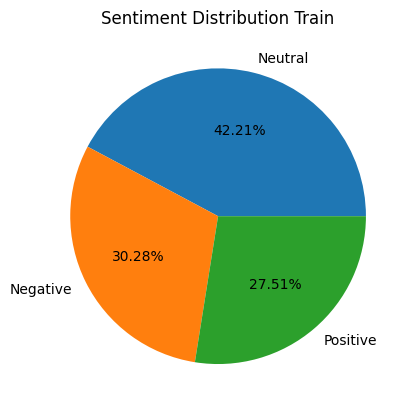

In [30]:
import matplotlib.pyplot as plt

# Sentiments visualization using Pie chart
sentiment_counts = df['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct=lambda pct: f'{pct:.2f}%')
plt.title('Sentiment Distribution Train')
plt.show()


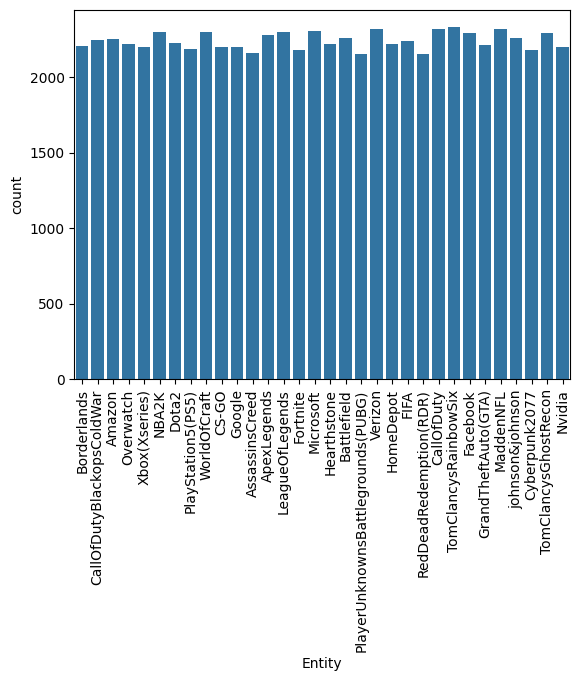

In [32]:
# Count distribution of Entities
sns.countplot(x="Entity",data=df)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
! pip install wordcloud

In [34]:
train_data = df.copy()

In [35]:
train_data.head()

,TweetID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [37]:
import pandas as pd
a = pd.read_csv('twitter_validation.csv')

In [42]:
a.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [43]:
a.columns = ['id','information','type','text']

In [44]:
a.head(3)

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."


In [45]:
a.shape

(999, 4)

In [46]:
a.isnull().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [47]:
a.duplicated().sum()

0

In [48]:
val_data = a.copy()

In [49]:
val_data.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [50]:
val_data['type']= val_data['type'].replace('Irrelevant','Neutral')
val_data['type'].value_counts()

type
Neutral     456
Positive    277
Negative    266
Name: count, dtype: int64

In [51]:
val_data['information'].value_counts()

information
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                       

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [53]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [55]:
train_data['preprocessed_text'] = train_data['Content'].apply(preprocess_text)
train_data

,TweetID,Entity,Sentiment,Content,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


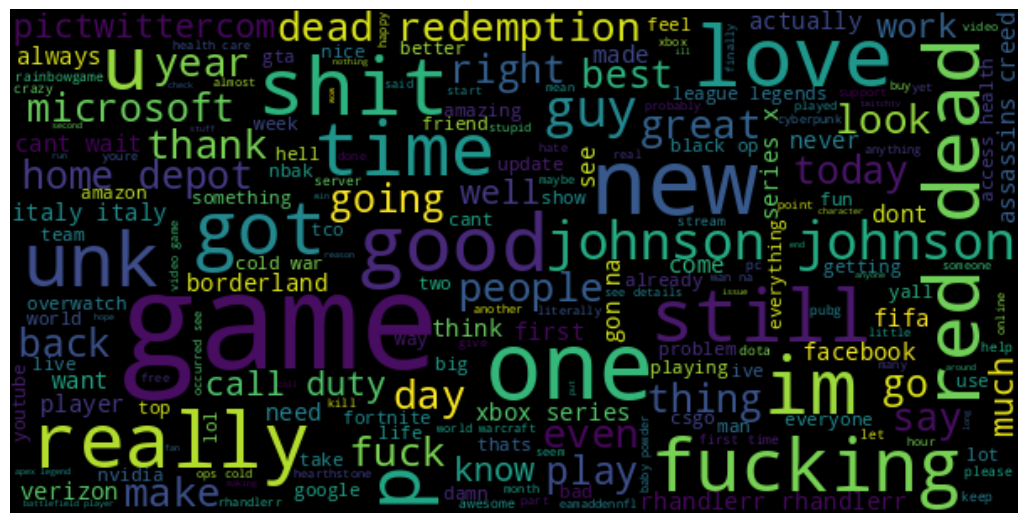

In [58]:
all_words = " ".join([sentence for sentence in train_data['preprocessed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=300, random_state=40, max_font_size=80).generate(all_words)

# plot the graph
plt.figure(figsize=(13,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
val_data['preprocessed_text'] = val_data['text'].apply(preprocess_text)
val_data

,id,information,type,text,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Neutral,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Neutral,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


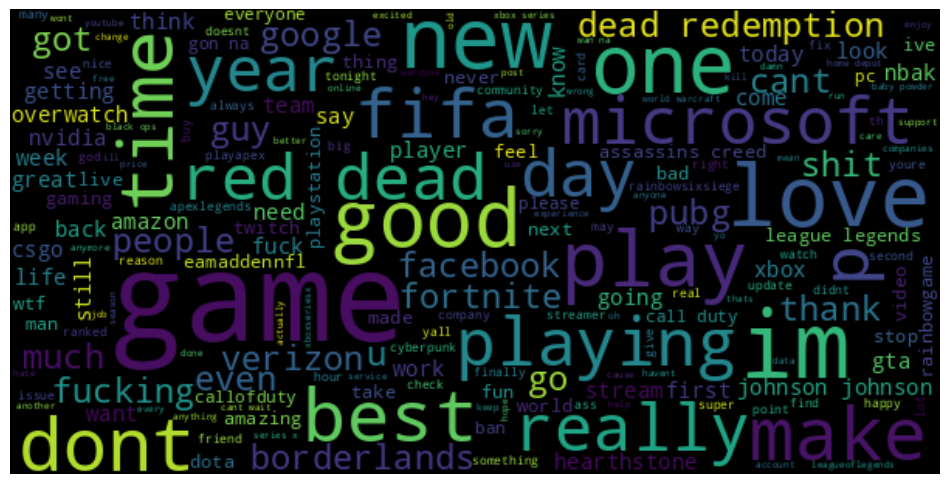

In [59]:
all_words = " ".join([sentence for sentence in val_data['preprocessed_text']])

wordcloud = WordCloud(width=600, height=300, random_state=40, max_font_size=80).generate(all_words)

# plot the graph
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()